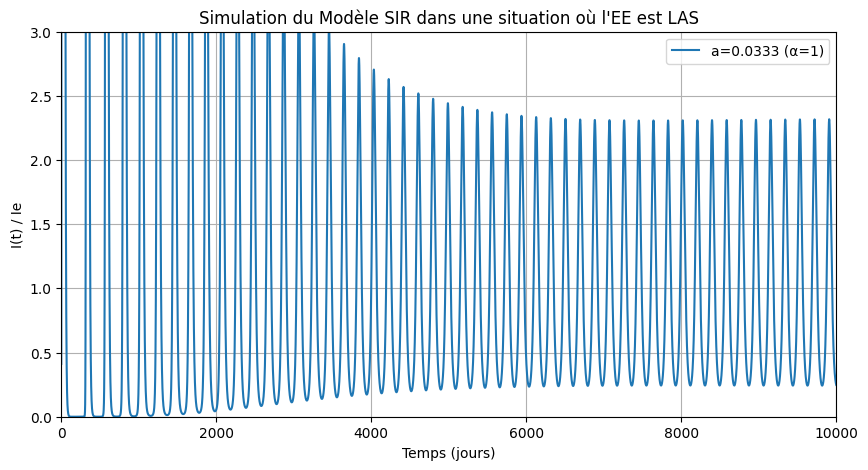

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définir les paramètres
m = 1 / (75 * 365)  # taux de mortalité (1/jour)
n = 1 / 7  # taux de rémission (1/jour)
k = 1
b0 = 20 * (m + n)
I_étoile = 0.9 * m / (m + n)

# Définir le système d'équations
def modele_SIR(y, t, a, alpha=1):
    S, I, M1, M = y
    dSdt = m * (1 - S) - (b0 / (1 + alpha * (M / I_étoile))) * I * S
    dIdt = (b0 / (1 + alpha * (M / I_étoile))) * I * S - (m + n) * I
    dM1dt = a * (k * I - M1)
    dMdt = a * (M1 - M)
    return [dSdt, dIdt, dM1dt, dMdt]

# Vecteur de temps
t = np.linspace(0, 10000, 100000)  # 10 000 jours avec une résolution fine

# Conditions initiales
S0 = 1 - 1e-4  # population initiale susceptible
I0 = 1e-4  # population initiale infectée
M10 = k * I0  # M1 initial
M0 = k * I0  # M initial

# Paramètre a
a = 1/30 # Ajusté pour une stabilité locale asymptotique

# Vecteur des conditions initiales
y0 = [S0, I0, M10, M0]

# Intégrer les équations SIR sur la grille de temps t
sol = odeint(modele_SIR, y0, t, args=(a, 1))
S, I, M1, M = sol.T

# Tracer I(t)/Ie
Ie = (m * (1 - (m + n) / b0)) / (m + n)  # Prévalence d'équilibre endémique
plt.figure(figsize=(10, 5))
plt.plot(t, I / Ie, label=f'a={a:.4f} (α=1)')
plt.ylim([0, 3])
plt.xlim([0, 10000])
plt.xlabel('Temps (jours)')
plt.ylabel('I(t) / Ie')
plt.title('Simulation du Modèle SIR dans une situation où l\'EE est LAS')
plt.grid()
plt.legend()
plt.show()


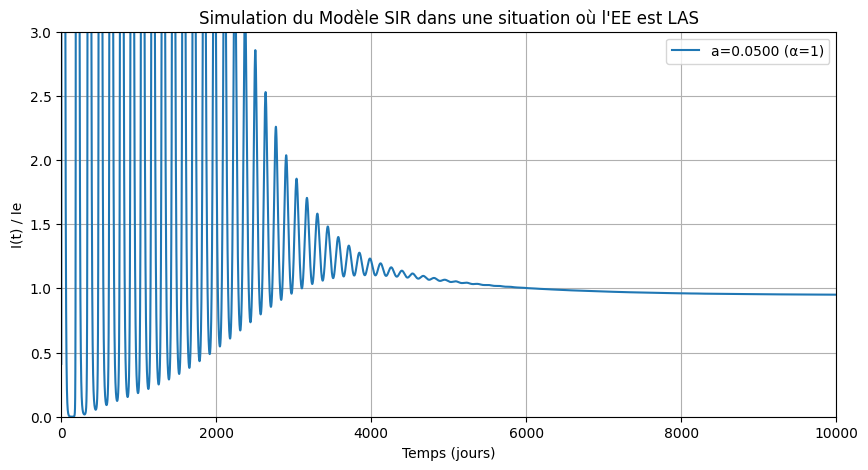

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Définir les paramètres
m = 1 / (75 * 365)  # taux de mortalité (1/jour)
n = 1 / 7  # taux de rémission (1/jour)
k = 1
b0 = 20 * (m + n)
I_étoile = 0.9 * m / (m + n)

# Définir le système d'équations
def modele_SIR(y, t, a, alpha=1):
    S, I, M1, M = y
    dSdt = m * (1 - S) - (b0 / (1 + alpha * (M / I_étoile))) * I * S
    dIdt = (b0 / (1 + alpha * (M / I_étoile))) * I * S - (m + n) * I
    dM1dt = a * (k * I - M1)
    dMdt = a * (M1 - M)
    return [dSdt, dIdt, dM1dt, dMdt]

# Vecteur de temps
t = np.linspace(0, 10000, 100000)  # 10 000 jours avec une résolution fine

# Conditions initiales
S0 = 1 - 1e-4  # population initiale susceptible
I0 = 1e-4  # population initiale infectée
M10 = k * I0  # M1 initial
M0 = k * I0  # M initial

# Paramètre a
a = 1/20 # Ajusté pour une stabilité locale asymptotique

# Vecteur des conditions initiales
y0 = [S0, I0, M10, M0]

# Intégrer les équations SIR sur la grille de temps t
sol = odeint(modele_SIR, y0, t, args=(a, 1))
S, I, M1, M = sol.T

# Tracer I(t)/Ie
Ie = (m * (1 - (m + n) / b0)) / (m + n)  # Prévalence d'équilibre endémique
plt.figure(figsize=(10, 5))
plt.plot(t, I / Ie, label=f'a={a:.4f} (α=1)')
plt.ylim([0, 3])
plt.xlim([0, 10000])
plt.xlabel('Temps (jours)')
plt.ylabel('I(t) / Ie')
plt.title('Simulation du Modèle SIR dans une situation où l\'EE est LAS')
plt.grid()
plt.legend()
plt.show()
